## Equilibria for the SHAR model with import

The equations to compute the equilibria are as follows:
\begin{align}
  0 &= - \beta \dfrac{S^*}{N} (H^* + \phi A^* + \rho N) + \alpha R^*,\\
  0 &= \eta \beta \dfrac{S^*}{N} (H^* + \phi A^* + \rho N) - \gamma H^*, \\
  0 &= (1-\eta) \beta \dfrac{S^*}{N} (H^* + \phi A^* + \rho N) - \gamma A^*, \\
  0 &= \gamma (H^*+A^*) - \alpha R^*, \\
  N &= S^*+H^*+A^*+R^*.
\end{align}

Combining the above first three equations, we obtain the following equality:

\begin{equation}
    \dfrac{\beta S^*}{N} (H^* + A^* + \rho N) = \alpha R^* = \dfrac{\gamma H^*}{\eta}= \dfrac{\gamma A^*}{1-\eta} \label{eqn:importst5}
\end{equation}

We also note that $S^* = N-H^*-A^*-R^*$. Combining this with the above equation, we get

\begin{align}
    S^* &= N - H^* - \frac{1-\eta}{\eta} H^* - \frac{\gamma}{\alpha \eta} H^*, \nonumber \\
    &= N- \left(\dfrac{\alpha+\gamma}{\alpha \eta}\right)H^* \nonumber
\end{align}

and substituting these to the second equation, we have

\begin{align}
    0 =& \dfrac{\eta \beta}{N}\left(N - \left(\dfrac{\alpha + \gamma}{\alpha \eta} \right) H^* \right)\left(H^* + \phi \dfrac{1-\eta}{\eta}H^* +\rho N \right)-\gamma H^*,  \nonumber\\
    =& \dfrac{-\beta}{N}\left(1+\dfrac{\gamma}{\alpha}\right) \left(1+\dfrac{\phi(1-\eta)}{\eta}\right) (H^*)^2 +  \left(\eta \beta + \beta \phi (1-\eta)-\beta \rho \left(1 + \dfrac{\gamma}{\alpha} \right) - \gamma \right) H^* + \eta \beta \rho N \nonumber
\end{align}

Solving the above system we obtain the following expression for $H$,



\begin{equation}
    H^* = \dfrac{-b - \sqrt{b^2 - 4ac}}{2a} \nonumber
\end{equation}

where
$
\begin{align}
    a&=\dfrac{-\beta}{N}\left(1+\dfrac{\gamma}{\alpha}\right) \left(1+\dfrac{\phi(1-\eta)}{\eta}\right) \label{eqn:aimport}\\
    b&=\left(\eta \beta + \beta \phi (1-\eta)-\beta \rho \left(1 + \dfrac{\gamma}{\alpha} \right) - \gamma \right) \label{eqn:bimport}\\
    c&=\eta \beta \rho N \label{eqn:cimport}
\end{align}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the parameters needed

In [2]:
""" Model Parameters """

N = 1

gamma = 0.05  # recovery rate

beta = 0.9*gamma # transmission rate wild type

phi = 1.6 # change of infectivity Aw versus the infectivity of Hw

eta =0.45 # fraction that develops severe disease after wild-type infection 

alpha = 1/180 # 1/alpha = mean duration of natural immunity

rho = 1e-5 # import rate 

R0 = (eta + (1-eta)*phi)*beta/gamma
print(R0)

1.197


Define a function for $H^{*}$

In [3]:

def Hstar(x):
    N, gamma, beta, phi, eta, alpha, rho = x
    a = (-beta/N)*(1 + gamma/alpha)*(1 + phi*(1-eta)/eta)
    b = eta*beta + beta*phi*(1-eta) - beta*rho*(1 + (gamma/alpha)) - gamma
    c = eta*beta*rho*N
    root = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return root


params = [N, gamma, beta, phi, eta, alpha, rho]
print(Hstar(params))

0.007423142520059756


Since $A^* = \dfrac{1-\eta}{\eta} H^*$ we can also define a function for $A^{*}$

In [4]:

def Astar(x):
    N, gamma, beta, phi, eta, alpha, rho = x
    H = Hstar(x)
    A = (1-eta)*H/eta
    return A

print(Astar(params))

0.009072729746739703


### Plots

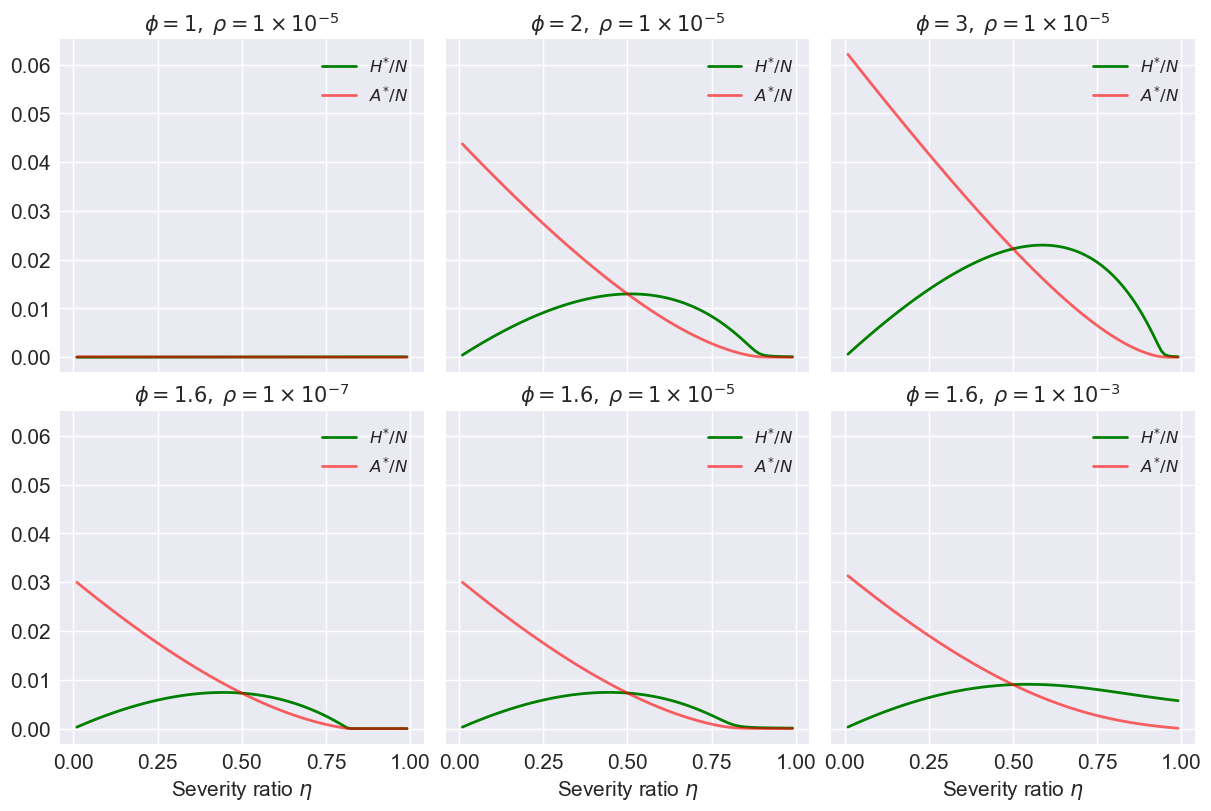

In [8]:
plt.style.use('seaborn')

eta_range = np.linspace(0.01, 0.99, 100)

# params = [N, gamma, beta, phi, eta, alpha, rho]

# PHI
paramsPhi1 = [N, gamma, beta, 1.0, eta_range, alpha, rho]
paramsPhi2 = [N, gamma, beta, 2.0, eta_range, alpha, rho]
paramsPhi3 = [N, gamma, beta, 3.0, eta_range, alpha, rho]

# RHO
paramsRho1 = [N, gamma, beta, phi, eta_range, alpha, 1e-7]
paramsRho2 = [N, gamma, beta, phi, eta_range, alpha, 1e-5]
paramsRho3 = [N, gamma, beta, phi, eta_range, alpha, 1e-3]


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(12,8), ncols=3, nrows=2, sharex=True, sharey=True, constrained_layout=True)

############# parameter PHI  ##################################
# Axis 1 for phi=1 
ax1.plot(eta_range, Hstar(paramsPhi1)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax1.plot(eta_range, Astar(paramsPhi1)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
#ax1.set_xlabel(r'$\eta$', fontsize=15)
#ax1.set_ylabel('Equilibria', fontsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_title(r'$\phi=1, \; \rho=1\times10^{-5}$', fontsize=15)
ax1.legend(loc='best', fontsize=12)

# Axis 2 for phi=2 
ax2.plot(eta_range, Hstar(paramsPhi2)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax2.plot(eta_range, Astar(paramsPhi2)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
#ax2.set_xlabel(r'$\eta$', fontsize=15)
#ax2.set_ylabel('Equilibria', fontsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_title(r'$\phi=2, \; \rho=1\times10^{-5}$', fontsize=15)
ax2.legend(loc='best', fontsize=12)

# Axis 3 for phi=3 
ax3.plot(eta_range, Hstar(paramsPhi3)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax3.plot(eta_range, Astar(paramsPhi3)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
#ax3.set_xlabel(r'$\eta$', fontsize=15)
#ax3.set_ylabel('Equilibria', fontsize=15)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)
ax3.set_title(r'$\phi=3, \; \rho=1\times10^{-5}$', fontsize=15)
ax3.legend(loc='best', fontsize=12)



############# parameter RHO  ##################################
# Axis 4 for rho=1e-7 
ax4.plot(eta_range, Hstar(paramsRho1)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax4.plot(eta_range, Astar(paramsRho1)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
ax4.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
#ax4.set_ylabel('Equilibria', fontsize=15)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
ax4.set_title(r'$\phi=1.6, \; \rho=1\times10^{-7}$', fontsize=15)
ax4.legend(loc='best', fontsize=12)

# Axis 5 for rho=1e-5 
ax5.plot(eta_range, Hstar(paramsRho2)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax5.plot(eta_range, Astar(paramsRho2)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
ax5.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
#ax5.set_ylabel('Equilibria', fontsize=15)
ax5.tick_params(axis='x', labelsize=15)
ax5.tick_params(axis='y', labelsize=15)
ax5.set_title(r'$\phi=1.6, \; \rho=1\times10^{-5}$', fontsize=15)
ax5.legend(loc='best', fontsize=12)

# Axis 6 for rho=1e-3 
ax6.plot(eta_range, Hstar(paramsRho3)/N, linewidth=2, label=r'$H^{*}/N$', color='green')
ax6.plot(eta_range, Astar(paramsRho3)/N, linewidth=2, label=r'$A^{*}/N$', color='red', alpha=0.6)
ax6.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
#ax6.set_ylabel('Equilibria', fontsize=15)
ax6.tick_params(axis='x', labelsize=15)
ax6.tick_params(axis='y', labelsize=15)
ax6.set_title(r'$\phi=1.6, \; \rho=1\times10^{-3}$', fontsize=15)
ax6.legend(loc='best', fontsize=12)

#plt.savefig("equilibria.pdf", bbox_inches = 'tight')
plt.show()